# Usage for debarcoding

In [1]:
import matplotlib.pyplot as plt
import scanpy as sc

import scyan

Global seed set to 0


## Model initialisation and fitting

In [2]:
adata, marker_pop_matrix = scyan.data.load("debarcoding")

model = scyan.Scyan(adata, marker_pop_matrix)

INFO:scyan.model:Initialized Scyan model with N=100000 cells, P=22 populations and M=6 markers. No covariate provided.


In [3]:
model.fit()

INFO:scyan.model:Training scyan with the following hyperparameters:
"alpha_batch_effect": 50.0
"batch_key":          None
"batch_ref":          None
"batch_size":         16384
"hidden_size":        16
"lr":                 0.001
"max_samples":        200000
"mmd_max_samples":    2048
"modulo_temp":        2
"n_hidden_layers":    7
"n_layers":           7
"prior_std":          0.3
"temperature":        1.0

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type        | Params
---------------------------------------
0 | module | ScyanModule | 29.7 K
---------------------------------------
29.7 K    Trainable params
0         Non-trainable params
29.7 K    Total params
0.119     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:scyan.model:Successfully ended traning.


Scyan model with N=100000 cells, P=22 populations and M=6 markers. No covariate provided.

In [4]:
model.predict();  # Predictions are saved in adata.obs.scyan_pop by default

## Results visualisation and interpretability

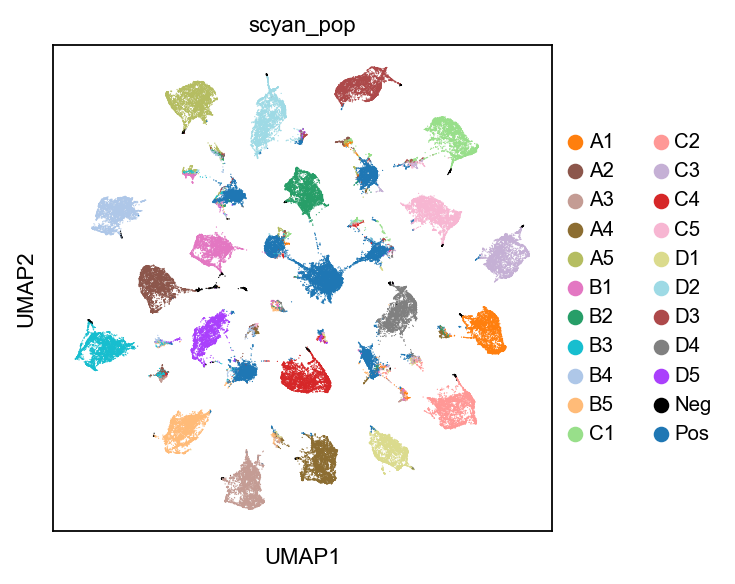

In [5]:
sc.pl.umap(model.adata, color="scyan_pop", palette=adata.uns["palette"])

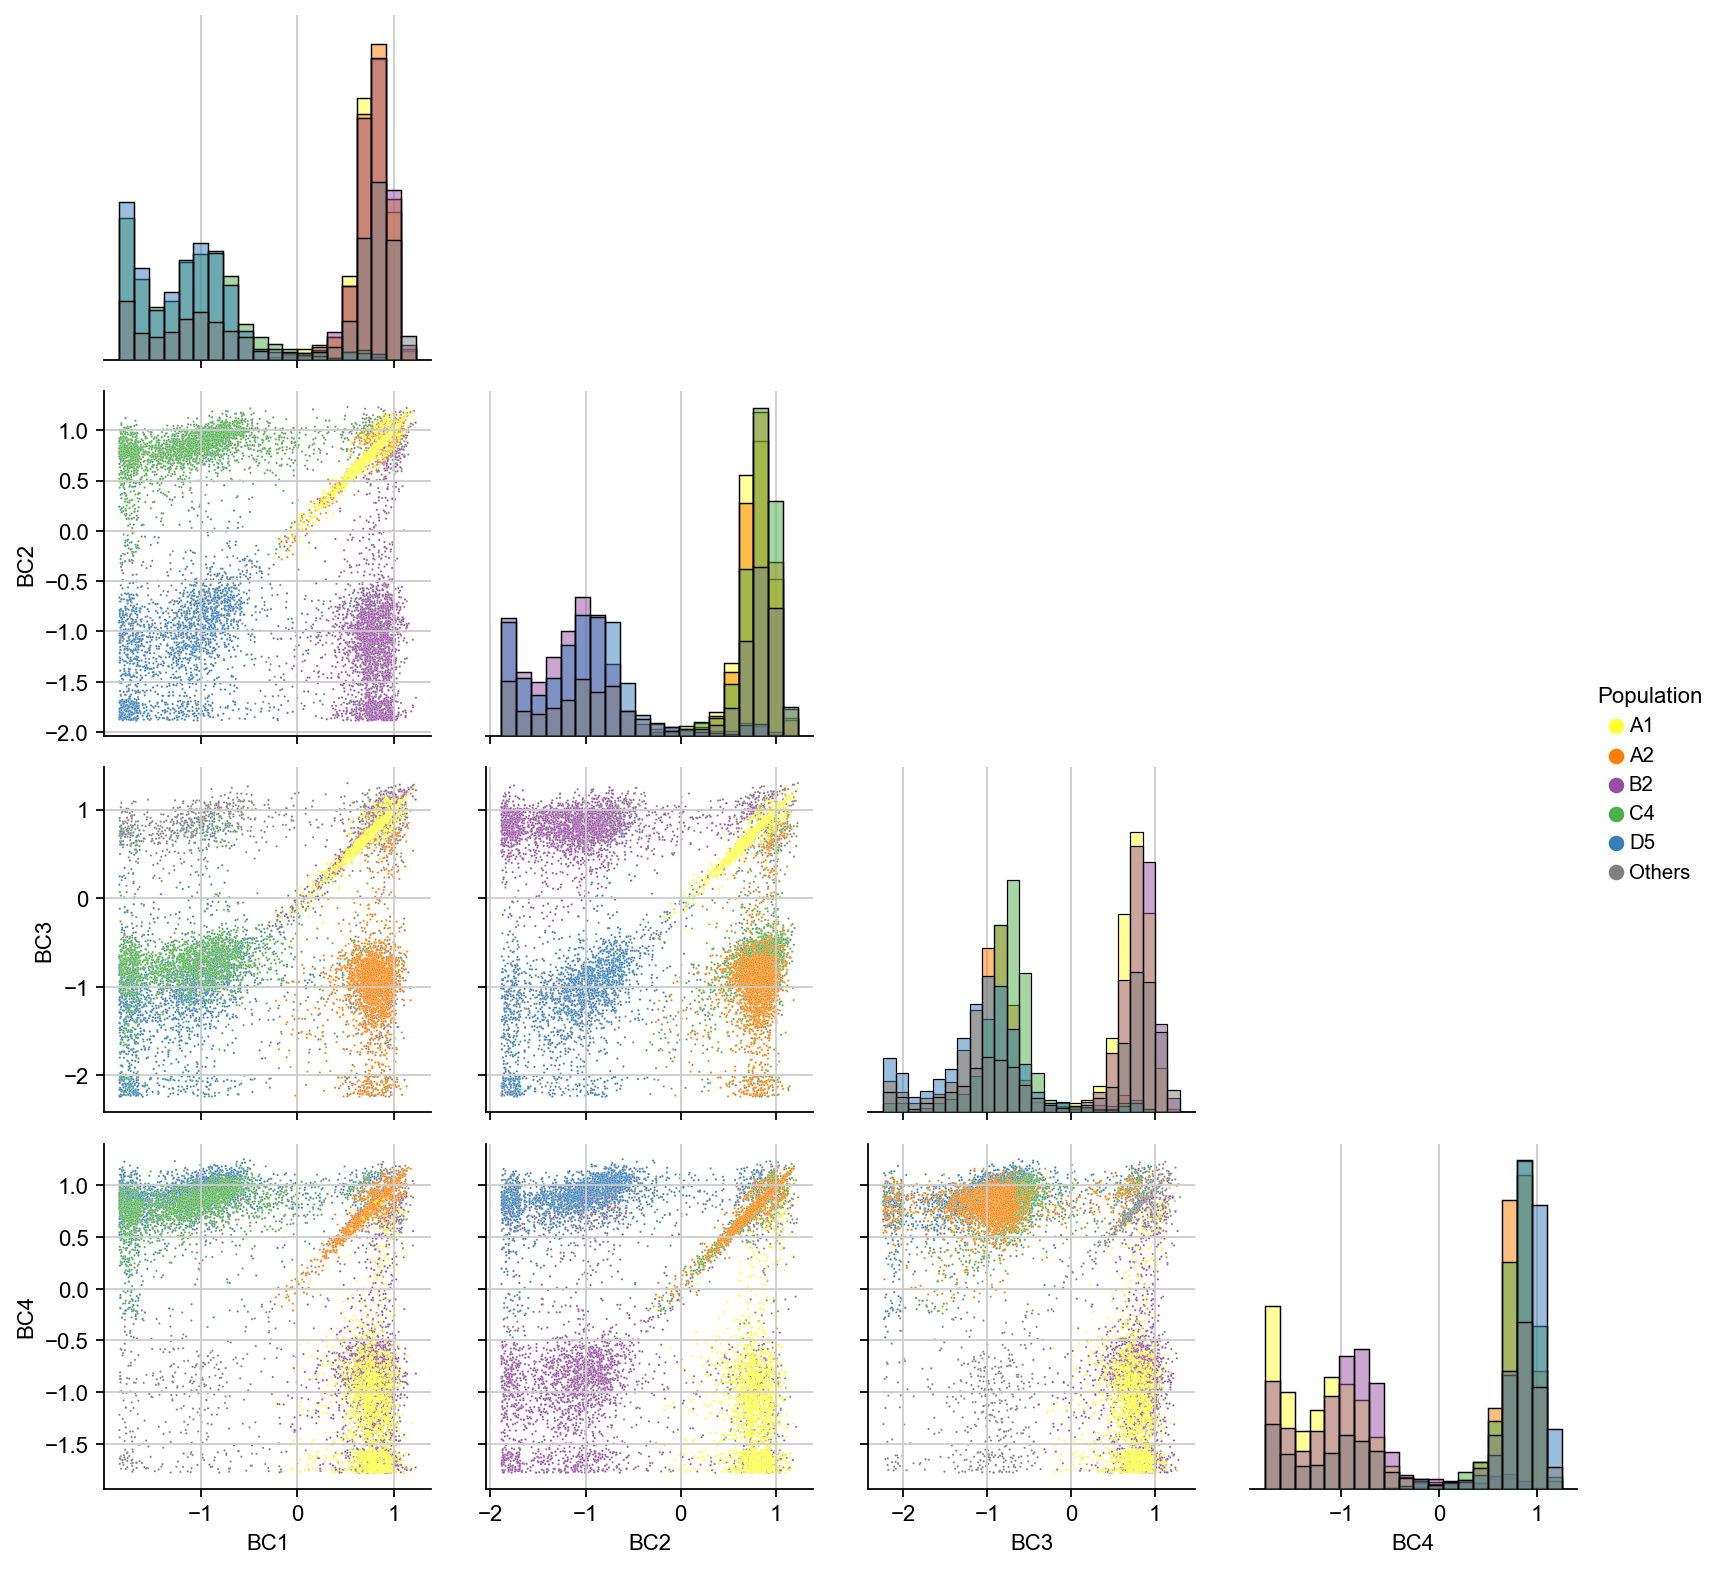

In [6]:
scyan.plot.scatter(model, ["A1", "A2", "B2", "C4", "D5"], markers=["BC1", "BC2", "BC3", "BC4"])

The latent space corresponds to the barcodes!

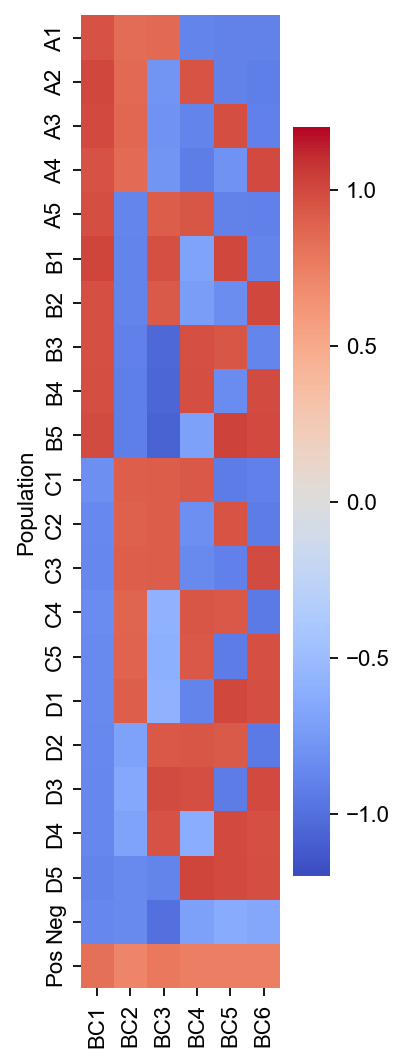

In [7]:
plt.figure(figsize=(2, 8))
scyan.plot.latent_heatmap(model)

One sample latent expression is its barcode.

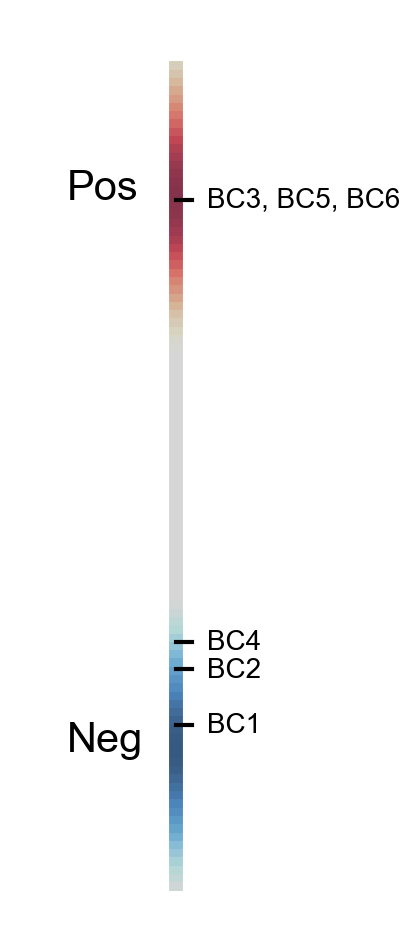

In [8]:
scyan.plot.latent_expressions(model, "D4")